# Compute DFTB energies and forces for the ~24.6k structures in CSD-10k_combined_w_kpts_11_pc dataset (_initial_ training set)

In [2]:
from ase.io import read, write
from ase.calculators.dftb import Dftb
import pickle
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

## Compute for training set

In [11]:
#Load database
with open('delta_data/CSD-10k_combined_w_kpts_11_pc.pickle', 'rb') as f:
    db = pickle.load(f)

In [12]:
#get array of all crystal names
names = []
for key in db.keys():
    names.append(key)

In [4]:
#set preliminary DFTB params
#These should be the exact same as I have found in DFTB input scripts from Edgar/Aditi (I thoroughly checked)
calc_preliminary = Dftb(Hamiltonian_='DFTB',
           Hamiltonian_Charge=0,
           Hamiltonian_DampXH='Yes',
           Hamiltonian_DampXHExponent = 4.0,
           Hamiltonian_Dispersion_ = 'DftD3',
           Hamiltonian_Dispersion_Damping='BeckeJohnson{}',
           Hamiltonian_Eigensolver='RelativelyRobust{}',
           Hamiltonian_HubbardDerivs_='',
           Hamiltonian_MaxAngularMomentum_='',
           Hamiltonian_SCC='Yes',
           Hamiltonian_SCCTolerance=1e-4,
           Hamiltonian_MaxSCCIterations=1000,
           Hamiltonian_SlaterKosterFiles_='Type2FileNames',
           Hamiltonian_SlaterKosterFiles_Prefix='"./dftb-param/"',
           Hamiltonian_SlaterKosterFiles_Separator='"-"',
           Hamiltonian_SlaterKosterFiles_Suffix='".skf"',
           Hamiltonian_SlaterKosterFiles_LowerCaseTypeName='No',
           Hamiltonian_ThirdOrderFull='Yes',
           Hamiltonian_Filling_='Fermi',
           Hamiltonian_Filling_Temperature=300*0.316681534524639E-05, #convert from K to Hartree!
           #Options_WriteResultsTag='No',
           #Options_WriteDetailedOut='No',
           #Options_WriteBandOut='No',
           ParserOptions_='',
           ParserOptions_ParserVersion=4,
           ParserOptions_IgnoreUnprocessedNodes = 'No',
           do_mulliken=False)

In [5]:
#Data that will need to be set in the loop, depending on which species are present

#Hamiltonian_HubbardDerivs_H=-0.1857, 
#Hamiltonian_HubbardDerivs_C=-0.1492, 
#Hamiltonian_HubbardDerivs_N=-0.1535, 
#Hamiltonian_HubbardDerivs_O=-0.1575,
#Hamiltonian_MaxAngularMomentum_H='"s"', 
#Hamiltonian_MaxAngularMomentum_C='"p"', 
#Hamiltonian_MaxAngularMomentum_N='"p"', 
#Hamiltonian_MaxAngularMomentum_O='"p"',

In [6]:
#Rename "forces" array to "PBE-D2_forces" to avoid confusion, and rename "energy" to "PBE-D2_energy"
for name in names:
    for frm in db[name]:
        frm.arrays['PBE-D2_forces'] = frm.arrays['forces'].copy() #add new array with good name
        frm.set_array('forces', None) #remove old array
        frm.info['PBE-D2_energy'] = frm.info['energy'].copy() #add new info with energy
        frm.info.pop('energy') #remove old energy info

In [7]:
#Compute DFTB energies and forces, and add them to the frames
for name in tqdm(names, desc="Crystal Progress", leave=False):
    for frm in tqdm(db[name], desc="Config Progress", leave=False):
        
        kpts = np.array2string(frm.info['kpts'], separator=' ')[1:-1] #Get K-points
        if len(kpts) != 5: #Print k points if they are longer than useful (for security) 
            print(name, frm) 
        kpts += ' 1.0' #add the k points "weight" for DFTB+
        
        calc=Dftb(**calc_preliminary.todict()) #Get preliminary calculator
        calc.set(Hamiltonian_KPointsAndWeights="{"+kpts+"}") #Set k points
        
        #Set Hubbard derivs and max angular momenta for the relevant species present
        if "H" in frm.get_chemical_symbols():
            calc.set(Hamiltonian_HubbardDerivs_H=-0.1857)
            calc.set(Hamiltonian_MaxAngularMomentum_H='"s"')
        if "C" in frm.get_chemical_symbols():
            calc.set(Hamiltonian_HubbardDerivs_C=-0.1492)
            calc.set(Hamiltonian_MaxAngularMomentum_C='"p"')
        if "N" in frm.get_chemical_symbols():
            calc.set(Hamiltonian_HubbardDerivs_N=-0.1535)
            calc.set(Hamiltonian_MaxAngularMomentum_N='"p"')
        if "O" in frm.get_chemical_symbols():
            calc.set(Hamiltonian_HubbardDerivs_O=-0.1575)
            calc.set(Hamiltonian_MaxAngularMomentum_O='"p"')
        
        frm.set_calculator(calc) #set calculator for the frame
        
        frm.info['DFTB_energy'] = frm.get_potential_energy() #calculate potential energy, and add it as info
        frm.arrays['DFTB_forces'] = frm.get_forces() #calculate forces, and add them as info


Crystal Progress:   0%|          | 0/2238 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

Config Progress:   0%|          | 0/11 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
#Save dataset
#with open('delta_data/CSD-10k_combined_w_kpts_11_pc_w_DFTB.pickle', 'wb') as f:
#    pickle.dump(db, f)

In [8]:
with open('delta_data/CSD-10k_combined_w_kpts_11_pc_w_DFTB.pickle', 'rb') as f:
    reloaded = pickle.load(f)

In [13]:
i=0
for name in names:
    for frm in db[name]:
        i+=1
print(i)

24618


In [14]:
j=0
for name in names:
    for frm in reloaded[name]:
        if 'DFTB_energy' in frm.info.keys():
            j+=1
print(j)

24618


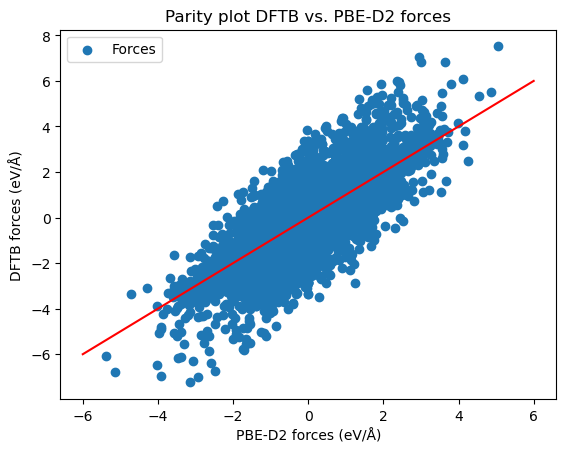

In [47]:
#Create parity plot of forces and energies
n=10; forces_pbe=[]; forces_dftb=[]; energies_pbe=[]; energies_dftb=[]
for name in names[:n]:
    for frm in reloaded[name]:
        forces_pbe.extend(frm.arrays['PBE-D2_forces'])
        forces_dftb.extend(frm.arrays['DFTB_forces'])

plt.scatter(forces_pbe, forces_dftb, label='Forces')
plt.plot([-6,6],[-6,6], 'red')
plt.title('Parity plot DFTB vs. PBE-D2 forces')
plt.xlabel('PBE-D2 forces (eV/Å)')
plt.ylabel('DFTB forces (eV/Å)')
plt.legend()
plt.plot(); plt.show()

## Recompute for test set

In [53]:
#Import test set
csd_2k = read('raw_data/CSD-1k_combined.xyz', ':')
#Only get CHNO
csd_1k = []
for frm in csd_2k:
    frm.wrap(eps=1e-13)
    good = True
    for elem in np.unique(frm.get_chemical_symbols()):
        if elem not in ['H', 'C', 'N', 'O']:
            good = False
    if good == True:
        csd_1k.append(frm)

In [54]:
csd_1k[2].info

{'Name': 'LOGHEV',
 'energy_unit': 'eV',
 'force_unit': 'eV/angstrom',
 'PBE-D2_energy': -25072.04180874}

CSD-1k set already has energies and forces named as PBE-D2_energies and PBE-D2_forces

In [4]:
#set preliminary DFTB params
#These should be the exact same as I have found in DFTB input scripts from Edgar/Aditi (I thoroughly checked)
calc_preliminary = Dftb(Hamiltonian_='DFTB',
           Hamiltonian_Charge=0,
           Hamiltonian_DampXH='Yes',
           Hamiltonian_DampXHExponent = 4.0,
           Hamiltonian_Dispersion_ = 'DftD3',
           Hamiltonian_Dispersion_Damping='BeckeJohnson{}',
           Hamiltonian_Eigensolver='RelativelyRobust{}',
           Hamiltonian_HubbardDerivs_='',
           Hamiltonian_MaxAngularMomentum_='',
           Hamiltonian_SCC='Yes',
           Hamiltonian_SCCTolerance=1e-4,
           Hamiltonian_MaxSCCIterations=1000,
           Hamiltonian_SlaterKosterFiles_='Type2FileNames',
           Hamiltonian_SlaterKosterFiles_Prefix='"./dftb-param/"',
           Hamiltonian_SlaterKosterFiles_Separator='"-"',
           Hamiltonian_SlaterKosterFiles_Suffix='".skf"',
           Hamiltonian_SlaterKosterFiles_LowerCaseTypeName='No',
           Hamiltonian_ThirdOrderFull='Yes',
           Hamiltonian_Filling_='Fermi',
           Hamiltonian_Filling_Temperature=300*0.316681534524639E-05, #convert from K to Hartree!
           #Options_WriteResultsTag='No',
           #Options_WriteDetailedOut='No',
           #Options_WriteBandOut='No',
           ParserOptions_='',
           ParserOptions_ParserVersion=4,
           ParserOptions_IgnoreUnprocessedNodes = 'No',
           do_mulliken=False)

In [29]:
kpoint_density=0.06 #from EAE NQE paper

In [34]:
for frm in csd_1k:
    #get lengths and angles
    cleang = frm.cell.cellpar()
    #get k points\n",
    kpoint = [int(math.ceil(
              1/( kpoint_density*float(cleang[it]))
              )) for it in range(0,3)]
    #translate k points to string, with space between each k point, to input into control.in file
    k_points_for_file= " ".join(str(k) for k in kpoint)

    #add k-points, formula, and volume info to the frame
    frm.info['kpts'] = np.asarray(kpoint)

In [35]:
#Compute DFTB energies and forces, and add them to the frames
for frm in tqdm(csd_1k, desc="Config Progress", leave=False):

    kpts = np.array2string(frm.info['kpts'], separator=' ')[1:-1] #Get K-points
    if len(kpts) != 5: #Print k points if they are longer than useful (for security) 
        print(name, frm) 
    kpts += ' 1.0' #add the k points "weight" for DFTB+

    calc=Dftb(**calc_preliminary.todict()) #Get preliminary calculator
    calc.set(Hamiltonian_KPointsAndWeights="{"+kpts+"}") #Set k points

    #Set Hubbard derivs and max angular momenta for the relevant species present
    if "H" in frm.get_chemical_symbols():
        calc.set(Hamiltonian_HubbardDerivs_H=-0.1857)
        calc.set(Hamiltonian_MaxAngularMomentum_H='"s"')
    if "C" in frm.get_chemical_symbols():
        calc.set(Hamiltonian_HubbardDerivs_C=-0.1492)
        calc.set(Hamiltonian_MaxAngularMomentum_C='"p"')
    if "N" in frm.get_chemical_symbols():
        calc.set(Hamiltonian_HubbardDerivs_N=-0.1535)
        calc.set(Hamiltonian_MaxAngularMomentum_N='"p"')
    if "O" in frm.get_chemical_symbols():
        calc.set(Hamiltonian_HubbardDerivs_O=-0.1575)
        calc.set(Hamiltonian_MaxAngularMomentum_O='"p"')

    frm.set_calculator(calc) #set calculator for the frame

    frm.info['DFTB_energy'] = frm.get_potential_energy() #calculate potential energy, and add it as info
    frm.arrays['DFTB_forces'] = frm.get_forces() #calculate forces, and add them as info


Config Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

In [36]:
#Save dataset
#with open('raw_data/CSD-1k_hcno_w_DFTB.pickle', 'wb') as f:
#    pickle.dump(csd_1k, f)

In [55]:
#Reload dataset
with open('raw_data/CSD-1k_hcno_w_DFTB.pickle', 'rb') as f:
    new_csd_1k = pickle.load(f)

In [70]:
len([i.info['DFTB_energy'] for i in new_csd_1k])

1000